In [133]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [134]:
data = pd.read_csv('/content/hight_weight.csv')
x = data['Weight (kg)'].values
y = data['Height (cm)'].values

In [135]:
data.head()

,Weight (kg),Height (cm)
0,50,152
1,60,165
2,65,168
3,70,174
4,85,186


In [136]:
# calculate prediction
def predict(x, m, b):
    return m * x + b

In [137]:
# calculate mean squared error
def mse(y_true, y_predicted):
  return np.mean((y_predicted - y_true)**2)


In [138]:
# calculate gradients
def gradients(x, y, m, b):
  n = len(x)
  y_hat = predict(x, m, b)
  error = y_hat - y
  dm = (2/n) * np.sum(x* error)
  db = (2/n) * np.sum(error)
  return dm, db

In [139]:
# calculate eacs step
# lr is the learning rate
def gd_step(x, y, m, b, lr):
    dm, db = gradients(x, y, m, b)
    m_new = m - lr * dm
    b_new = b - lr * db
    return m_new, b_new

In [140]:
# calculate gradient descents
def gradient_descent(x, y, m0=0.0, b0=0.0, lr=0.01, n_iters=1000):
  m, b = m0, b0

  Loss= []



  for it in range(1, n_iters + 1):

        m, b = gd_step(x, y, m, b, lr)


        loss = mse(y, predict(x, m, b))


        Loss.append(loss)

  return m, b, Loss


In [128]:
# calculate the slope and y-intercept
m, b, L = gradient_descent(x, y, lr=0.0001, n_iters=70000)
print(m, b, L[-1])

1.980531882164417 36.203673361575845 146.93120076913468


**Predict the height for a person weighing 72 kg**

In [129]:
w_72 = predict(72, m, b)
print(f"Predicted height for a person weighing 72 kg: {w_72:.2f} cm")

Predicted height for a person weighing 72 kg: 178.80 cm


In [130]:
# assigning the line equation, so we can plot it
y_plot = m * x + b

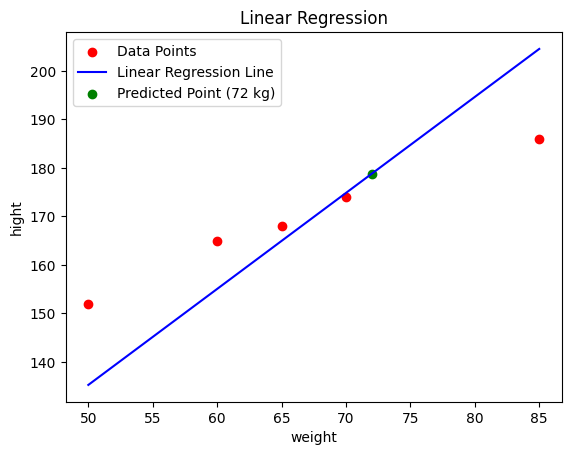

In [131]:
# plotting the predction on the actual data
plt.scatter(x,y, c ='red')
plt.plot(x,y_plot, c ='blue')
plt.scatter([72], w_72, c = 'green')
plt.title('Linear Regression')
plt.xlabel('weight')
plt.ylabel('hight')
plt.legend(['Data Points', 'Linear Regression Line', 'Predicted weight (72 kg)'])
plt.show()

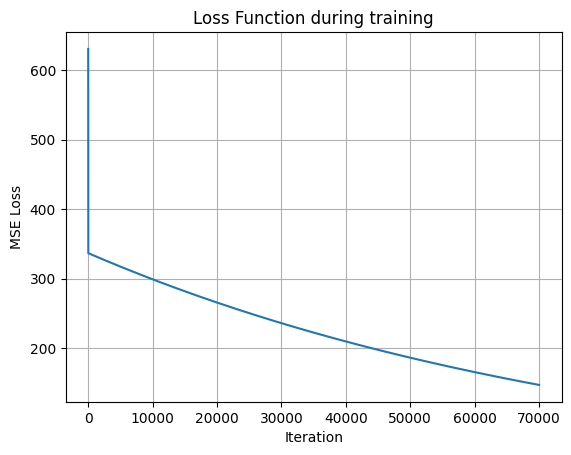

In [132]:
plt.plot(range(1,len(L)+1),L)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Loss Function during training")
plt.grid(True)
plt.show()